In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math

In [ ]:
data = pd.read_csv('/content/infy_DS4.csv')
# Check the structure of the dataset (data types, missing values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 29.2+ KB

In [ ]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-2015,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870310e+13,14908,258080,0.5154
1,02-01-2015,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394670e+14,54166,1249104,0.7371
2,05-01-2015,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979910e+14,82694,1830962,0.7370
3,06-01-2015,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724460e+14,108209,1772070,0.7332
4,07-01-2015,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557160e+14,62463,1317720,0.7270


In [ ]:
# Check for missing values and summary statistics of numerical columns
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,248.000000
mean,1551.474798,1550.506855,1566.266532,1530.085887,1548.084879,1547.978226,1548.133589,2.982072e+06,4.234133e+14,92675.024194,1.940081e+06,0.662305
std,529.396894,530.578342,534.714088,524.194873,529.493276,529.468189,528.861589,2.043627e+06,2.708338e+14,50541.614178,1.113896e+06,0.085663
min,937.500000,941.000000,952.100000,932.650000,935.500000,937.500000,941.180000,3.536520e+05,3.923480e+13,13196.000000,1.662220e+05,0.300400
25%,1085.912500,1088.000000,1099.975000,1067.150000,1086.875000,1085.912500,1085.907500,1.722753e+06,2.847068e+14,63052.250000,1.139407e+06,0.616075
50%,1149.650000,1150.000000,1159.725000,1131.150000,1145.625000,1149.325000,1146.245000,2.532474e+06,3.624710e+14,80019.000000,1.717132e+06,0.676250
75%,2125.312500,2136.137500,2150.000000,2104.500000,2125.250000,2125.312500,2125.082500,3.567063e+06,4.915435e+14,106617.250000,2.467728e+06,0.723525
max,2324.700000,2328.500000,2336.000000,2292.050000,2323.200000,2324.700000,2322.170000,1.915506e+07,2.285440e+15,408583.000000,9.575992e+06,0.853200


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
# Convert 'Date' column to datetime format for time series analysis
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set the 'Date' column as the index for time series analysis
data.set_index('Date', inplace=True)

# Checking the structure after the preprocessing steps
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              248 non-null    object 
 1   Series              248 non-null    object 
 2   Prev Close          248 non-null    float64
 3   Open                248 non-null    float64
 4   High                248 non-null    float64
 5   Low                 248 non-null    float64
 6   Last                248 non-null    float64
 7   Close               248 non-null    float64
 8   VWAP                248 non-null    float64
 9   Volume              248 non-null    int64  
 10  Turnover            248 non-null    float64
 11  Trades              248 non-null    int64  
 12  Deliverable Volume  248 non-null    int64  
 13  %Deliverble         248 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 29.1+ KB


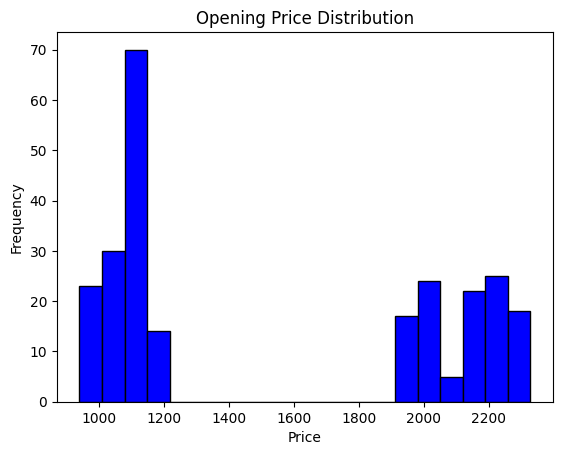

In [ ]:
plt.hist(data['Open'], bins=20, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Opening Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

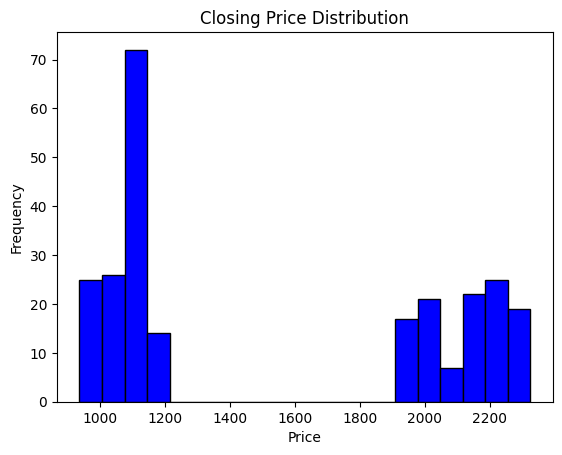

In [ ]:
plt.hist(data['Close'], bins=20, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Closing Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

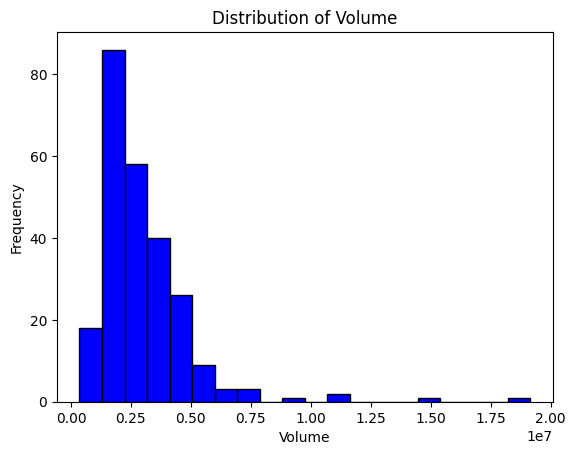

In [ ]:
plt.hist(data['Volume'], bins=20, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
data.isna().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


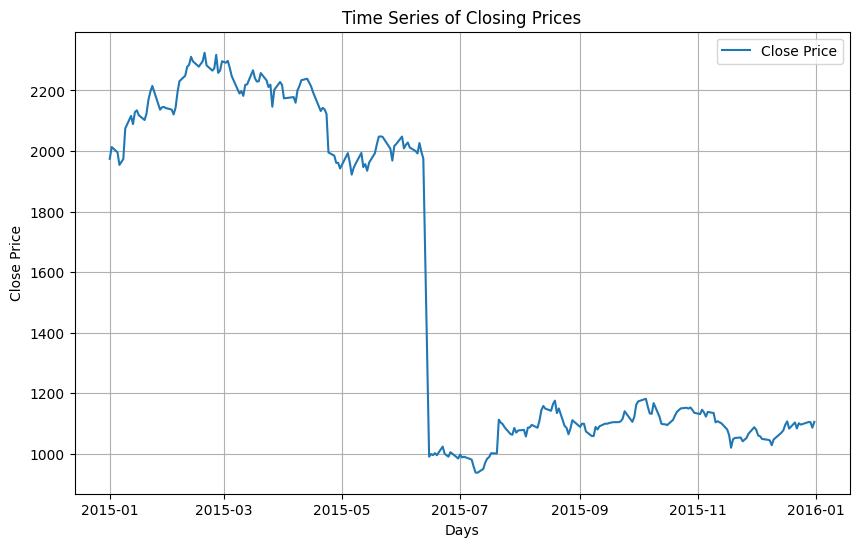

In [ ]:
# Time series plot for the 'Close' prices to observe trends and seasonality
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title('Time Series of Closing Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

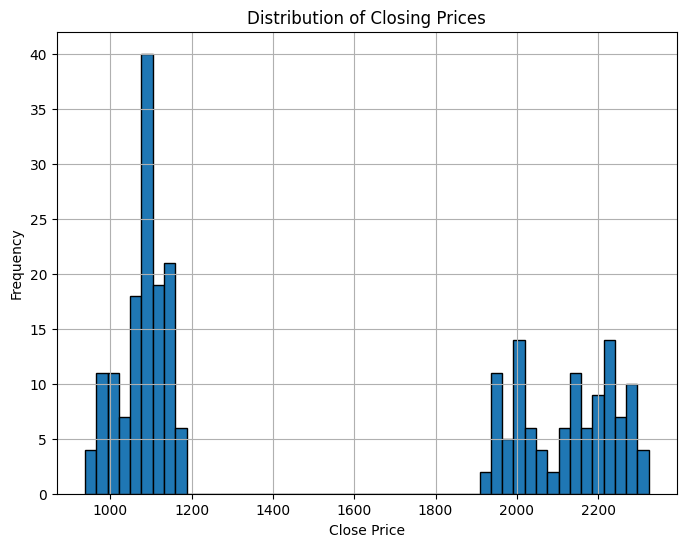

In [ ]:
# Histogram to understand the distribution of 'Close' prices
plt.figure(figsize=(8, 6))
plt.hist(data['Close'], bins=50, edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

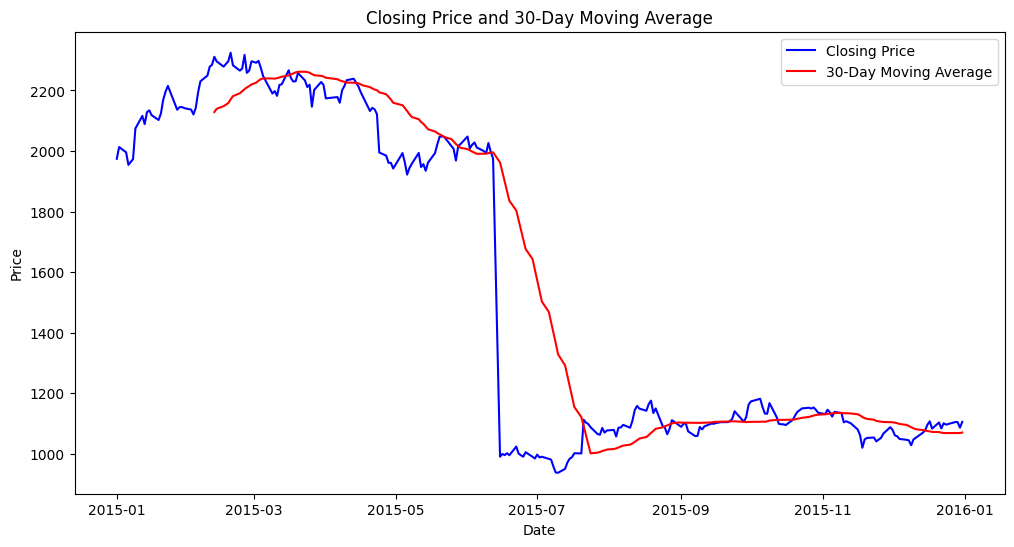

In [ ]:
# Calculate the moving average (window size can be adjusted, e.g., 30 for 30-day MA)
data['Moving_Average_30'] = data['Close'].rolling(window=30).mean()

# Plot the closing price and moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['Moving_Average_30'], label='30-Day Moving Average', color='red')
plt.title('Closing Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

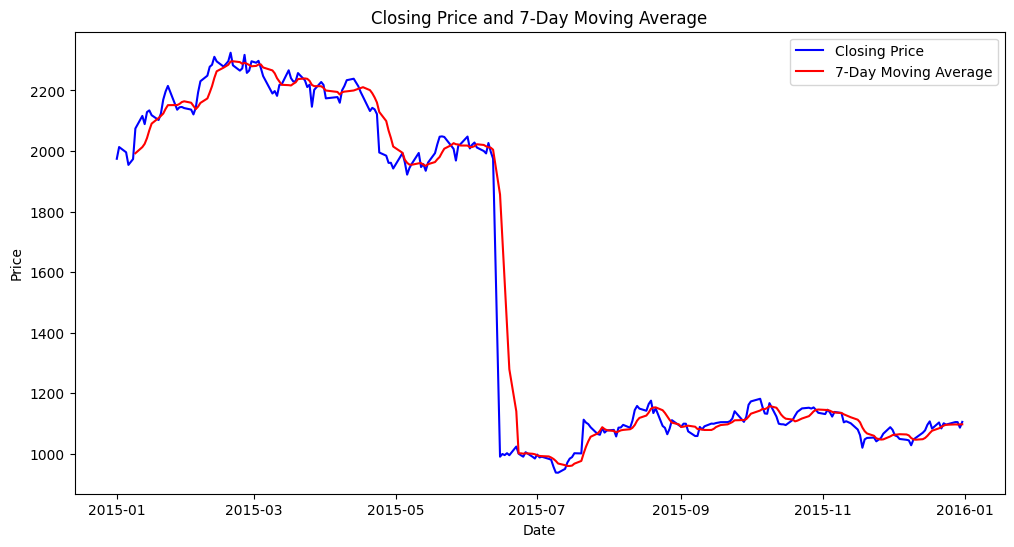

In [ ]:
# Calculate the moving average (window size can be adjusted, e.g., 7 for 7-day MA)
data['Moving_Average_7'] = data['Close'].rolling(window=7).mean()

# Plot the closing price and moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['Moving_Average_7'], label='7-Day Moving Average', color='red')
plt.title('Closing Price and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data_for_evaluation = data.dropna(subset=['Moving_Average_30'])
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(data_for_evaluation['Close'],
data_for_evaluation['Moving_Average_30']))

# Calculate MSE
mse = mean_squared_error(data_for_evaluation['Close'],
data_for_evaluation['Moving_Average_30'])

print("RMSE:", rmse)
print("MSE:", mse)

RMSE: 221.86978673064428
MSE: 49226.20226390157


Moving Average Evaluation

In [ ]:
data_for_evaluation = data.dropna(subset=['Moving_Average_7'])
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(data_for_evaluation['Close'],
data_for_evaluation['Moving_Average_7']))

# Calculate MSE
mse = mean_squared_error(data_for_evaluation['Close'],
data_for_evaluation['Moving_Average_7'])

print("RMSE:", rmse)
print("MSE:", mse)

RMSE: 94.10120078626217
MSE: 8855.035989416428


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


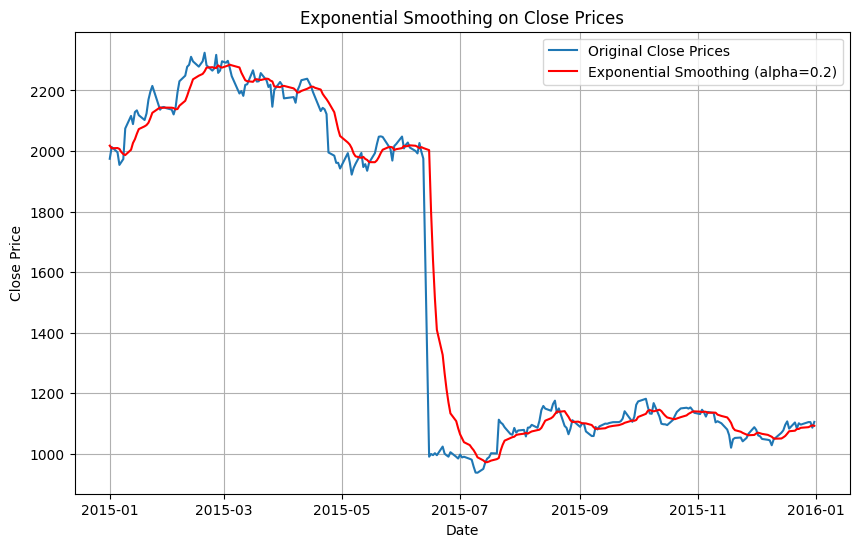

In [ ]:
exp_smoothing_model = ExponentialSmoothing(data['Close'], trend=None, seasonal=None, seasonal_periods=None)
exp_smoothing_fit = exp_smoothing_model.fit(smoothing_level=0.2)  # You can adjust the smoothing level (alpha)

# Plot the original data along with smoothed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original Close Prices')
plt.plot(data.index, exp_smoothing_fit.fittedvalues, label='Exponential Smoothing (alpha=0.2)', color='red')
plt.title('Exponential Smoothing on Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


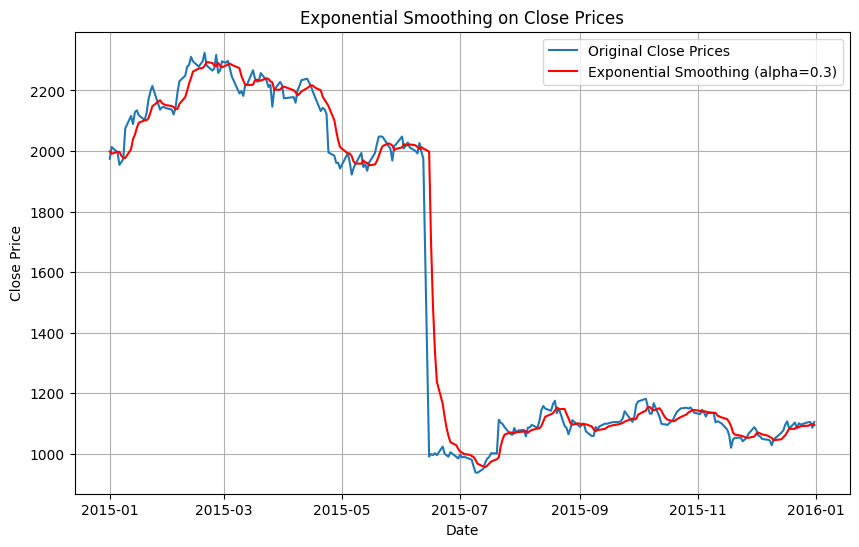

In [ ]:
exp_smoothing_model = ExponentialSmoothing(data['Close'], trend=None, seasonal=None, seasonal_periods=None)
exp_smoothing_fit1 = exp_smoothing_model.fit(smoothing_level=0.3)  # You can adjust the smoothing level (alpha)

# Plot the original data along with smoothed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original Close Prices')
plt.plot(data.index, exp_smoothing_fit1.fittedvalues, label='Exponential Smoothing (alpha=0.3)', color='red')
plt.title('Exponential Smoothing on Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


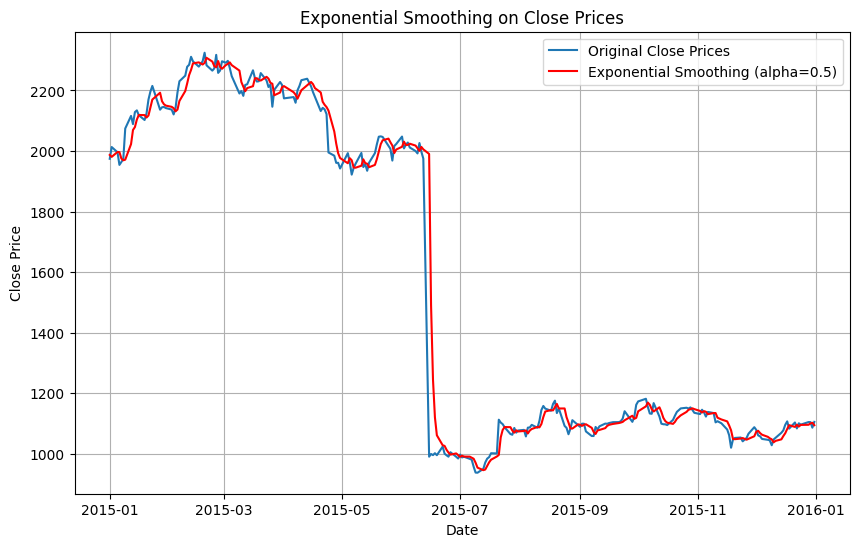

In [ ]:
exp_smoothing_model = ExponentialSmoothing(data['Close'], trend=None, seasonal=None, seasonal_periods=None)
exp_smoothing_fit2 = exp_smoothing_model.fit(smoothing_level=0.5)  # You can adjust the smoothing level (alpha)

# Plot the original data along with smoothed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original Close Prices')
plt.plot(data.index, exp_smoothing_fit2.fittedvalues, label='Exponential Smoothing (alpha=0.5)', color='red')
plt.title('Exponential Smoothing on Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
exp_smoothing_forecast = exp_smoothing_fit2.forecast(steps=10)
print("Forecast for the next 10 periods:")
print(exp_smoothing_forecast)

Forecast for the next 10 periods:
248    1099.90153
249    1099.90153
250    1099.90153
251    1099.90153
252    1099.90153
253    1099.90153
254    1099.90153
255    1099.90153
256    1099.90153
257    1099.90153
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Calculate RMSE and MSE for Exponential Smoothing
exp_smoothing_rmse = np.sqrt(mean_squared_error(data['Close'][-10:], exp_smoothing_forecast[:10]))
exp_smoothing_mse = mean_squared_error(data['Close'][-10:], exp_smoothing_forecast[:10])

# Print the results
print("Exponential Smoothing RMSE:", exp_smoothing_rmse)
print("Exponential Smoothing MSE:", exp_smoothing_mse)

Exponential Smoothing RMSE: 9.387097623375196
Exponential Smoothing MSE: 88.11760179077626


Exponential Smoothening

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
result = adfuller(data['Close'])
# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Interpret the results
if result[1] <= 0.05:
 print("The time series is likely stationary.")
else:
 print("The time series is likely non-stationary.")

ADF Statistic: -0.9919061956071852
p-value: 0.7562048713501716
Critical Values: {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}
The time series is likely non-stationary.


In [ ]:
# Differencing the time series to make it stationary
data_diff = data['Close'].diff().dropna()

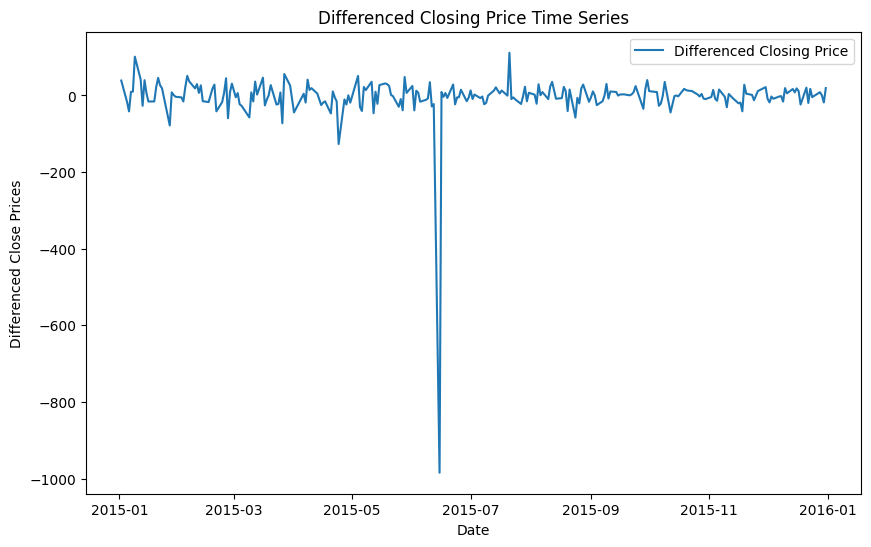

In [ ]:
# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Closing Price')
plt.title('Differenced Closing Price Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Close Prices')
plt.legend()
plt.show()

In [ ]:
# Perform ADF test on the differenced data
result_diff = adfuller(data_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])
# Interpret the results
if result_diff[1] <= 0.05:
 print("The time series is likely stationary.")
else:
 print("The time series is likely non-stationary.")

ADF Statistic (Differenced): -15.513918536230394
p-value (Differenced): 2.3294942281083555e-28
Critical Values (Differenced): {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}
The time series is likely stationary.


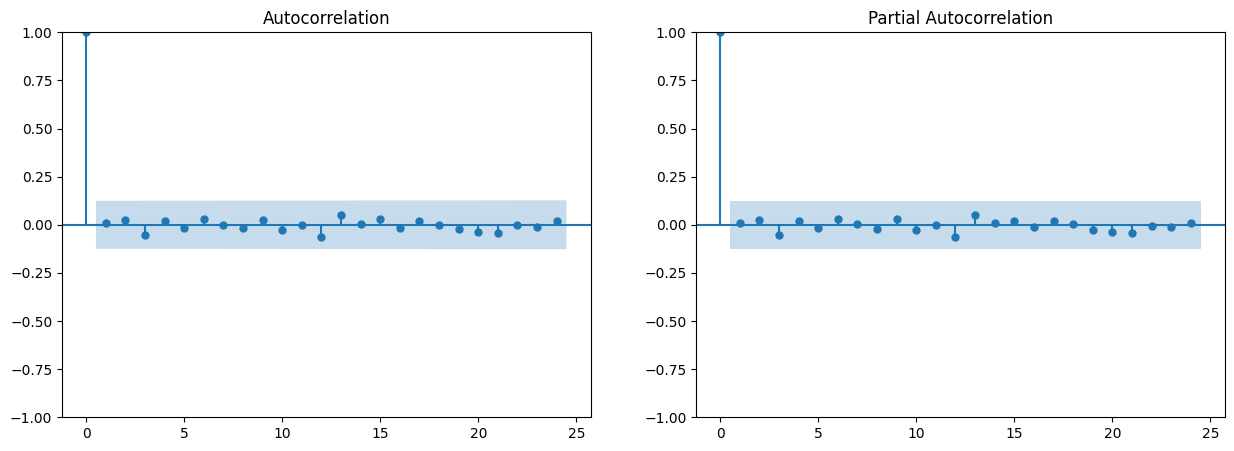

In [ ]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  248
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1392.005
Date:                Tue, 01 Oct 2024   AIC                           2786.010
Time:                        09:10:01   BIC                           2789.520
Sample:                             0   HQIC                          2787.423
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4598.2005     43.724    105.164      0.000    4512.502    4683.898
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            323215.37
Prob(Q):                              0.91   Pr

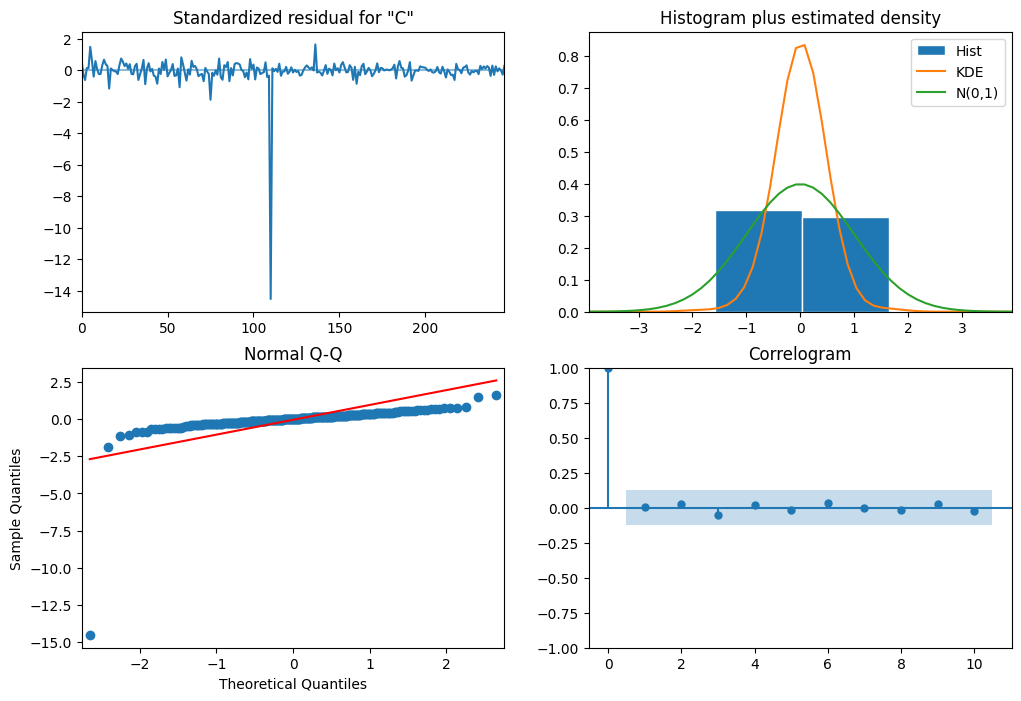

In [ ]:
 #Define the parameters based on analysis
p = 0 # Based on PACF plot
d = 1 # Based on differencing (already differentiated)
q = 0 # Based on ACF plot
# Build and fit the ARIMA model
model = ARIMA(data['Close'], order=(p, d, q))
arima_result = model.fit()
# Display the summary of the model
print(arima_result.summary())
# Diagnostics plots
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  248
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1391.980
Date:                Tue, 01 Oct 2024   AIC                           2789.961
Time:                        09:10:08   BIC                           2800.489
Sample:                             0   HQIC                          2794.199
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3124     25.951      0.012      0.990     -50.550      51.174
ma.L1         -0.2989     25.985     -0.012      0.991     -51.228      50.630
sigma2      4602.4233     73.297     62.792      0.0

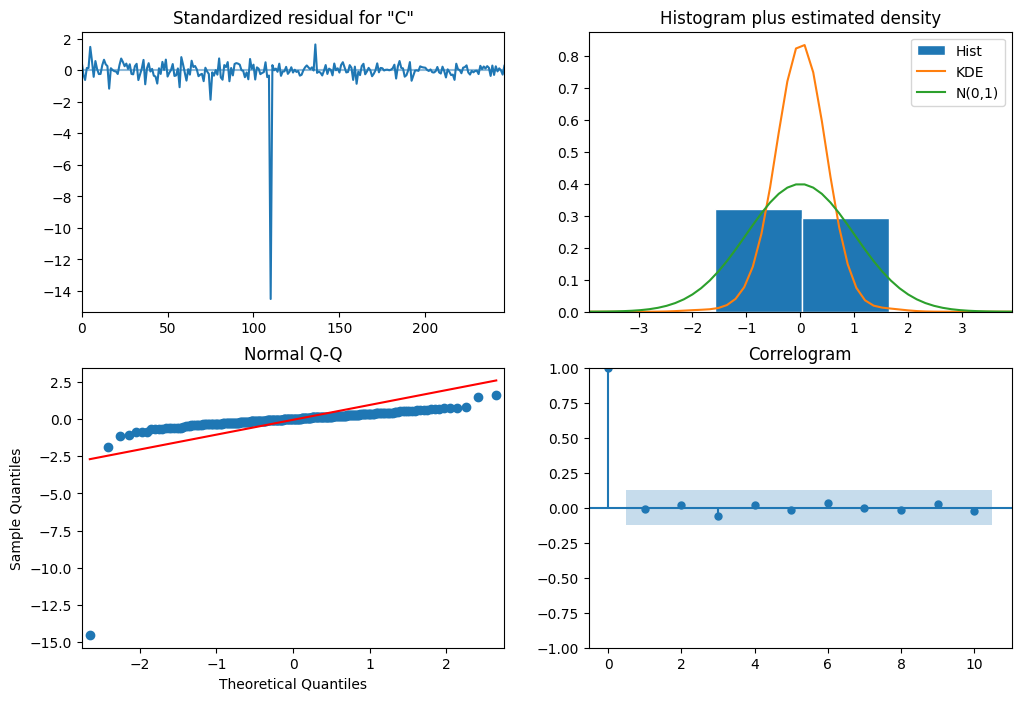

In [ ]:
#Define the parameters based on analysis
p = 1 # Based on PACF plot
d = 1 # Based on differencing (already differentiated)
q = 1 # Based on ACF plot
# Build and fit the ARIMA model
model = ARIMA(data['Close'], order=(p, d, q))
arima_result = model.fit()
# Display the summary of the model
print(arima_result.summary())
# Diagnostics plots
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

In [ ]:
forecast = exp_smoothing_fit2.forecast(steps=20)
print(forecast) # Print the forecasted values

248    1099.90153
249    1099.90153
250    1099.90153
251    1099.90153
252    1099.90153
253    1099.90153
254    1099.90153
255    1099.90153
256    1099.90153
257    1099.90153
258    1099.90153
259    1099.90153
260    1099.90153
261    1099.90153
262    1099.90153
263    1099.90153
264    1099.90153
265    1099.90153
266    1099.90153
267    1099.90153
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


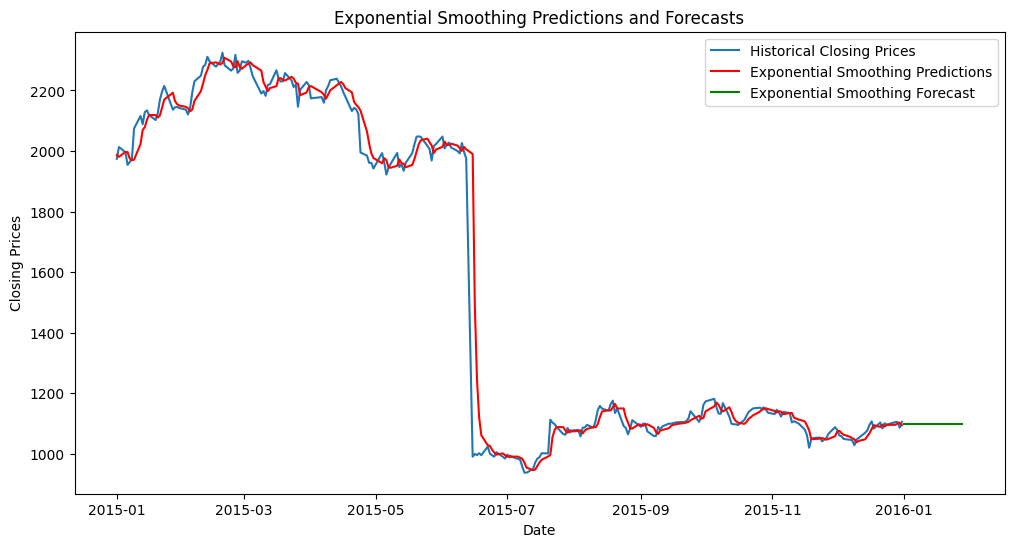

In [ ]:
# In-sample predictions (on training data)
predictions_exp = exp_smoothing_fit2.fittedvalues

# Forecast for future values
forecast_steps = 20
forecast_exp = exp_smoothing_fit2.forecast(steps=forecast_steps)

# Adjust the forecast index to start from the end of the historical data
last_date = data.index[-1]
forecast_exp_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]  # Forecast starts one step ahead

# Plotting the historical data, predictions, and forecasts
plt.figure(figsize=(12, 6))

# Historical data from 2015 onwards
plt.plot(data['Close']['2015':], label='Historical Closing Prices')

# In-sample predictions from Exponential Smoothing
plt.plot(predictions_exp['2015':], label='Exponential Smoothing Predictions', color='red')

# Forecast (future values)
plt.plot(forecast_exp_index, forecast_exp, label='Exponential Smoothing Forecast', color='green')

# Adding title and labels
plt.title('Exponential Smoothing Predictions and Forecasts')
plt.xlabel('Date')
plt.ylabel('Closing Prices')

# Show legend and plot
plt.legend()
plt.show()